# DEFINING THE QUESTION

## a) Specifying the Question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

---

## b) Defining the Metric for Success

Being able to accurately predict house prices

---


## c) Understanding the context

Housing Prices differ depending on Location, Property Type and Square Footage of houses among other things. For a Real Estate Company, it would be good to know how to determine which properties do well in a market depending on the factors that affect these prices. This will enable them to price their properties at appropriate prices and could help them know how the value of the properties could appreciate in the future. Consumers would also be able to access this information if they wanted to.

---

## d) Experimental Design

1. Read and explore the given dataset.
2. Find and deal with outliers, anomalies, and missing data within the dataset.
3. Perform univariate and bivariate analysis recording your observations.
4. Perform Exploratory Data Analysis.
5. Performing regression analysis.
6. Provide a recommendation based on your analysis. 
7. Challenge your solution by providing insights on how you can make improvements in model improvement.  

---

# DATA PREPARATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

%matplotlib inline

In [2]:
house = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house.shape

(21613, 20)

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

From the information given in the IP documentation, the column name definitions are:

Id 

price  - Price of the house

bedrooms - Number of Bedrooms

bathrooms - Number of Bathrooms

sqft_living - Square feet area of living area

sqft_lot  - Square feet area of parking Layout

floors - Number of Floors

waterfront - Whether waterfront is there or not

view - Number of Views

grade - Grades

sqft_above

sqft_basement - Square feet area of basement

yr_built - Year the house is built

yr_renovated - Year the house is renovated

zipcode - zipcode of the house

lat : Latitude of the house

lon : Longitude of the house

sqft_living15

sqft_lot15

# DATA CLEANING

In [5]:
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
house.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
house.duplicated().sum()

3

In [8]:
house[house.duplicated()]

# The records look ok, rather than duplicated records. We'll keep all of them.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14983,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20054,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


In [9]:
house.drop(columns = ['id'], inplace = True)

In [10]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The Dataset is relatively clean, we've drop the ID column for the following sections.

# DATA ANALYSIS

## UNIVARIATE ANALYSIS

In [11]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

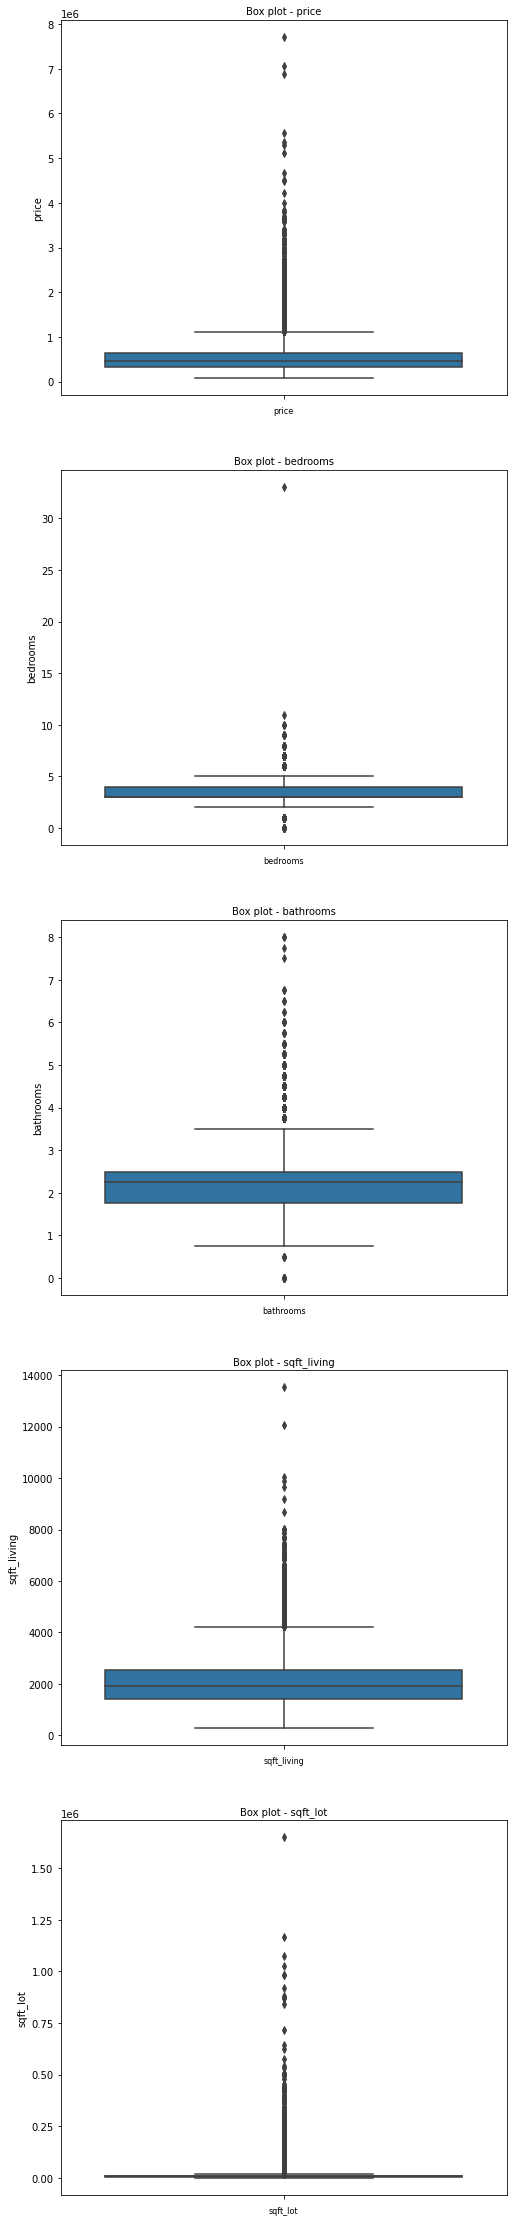

In [12]:
col_names = ['price','bedrooms', 'bathrooms', 'sqft_living','sqft_lot']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = house[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()


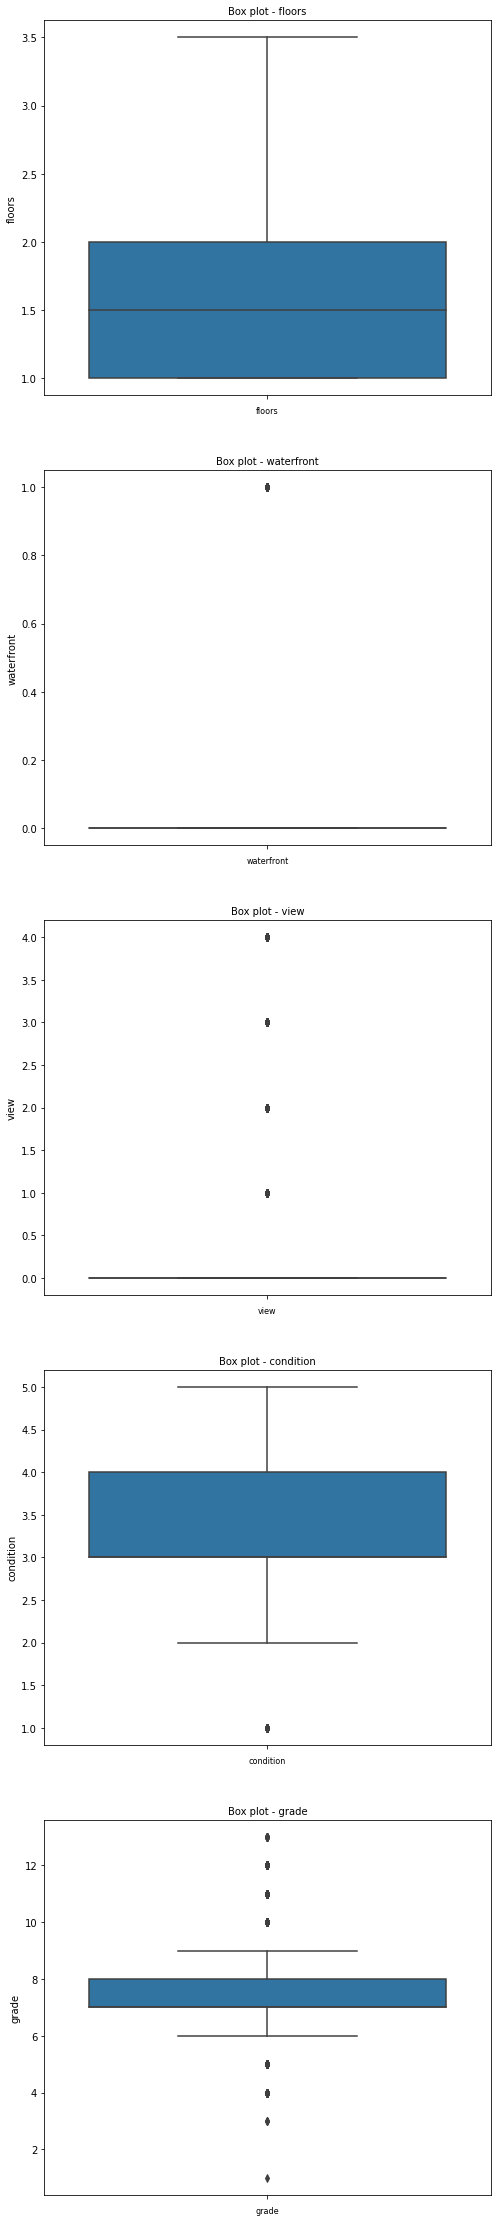

In [13]:
col_names = ['floors','waterfront', 'view', 'condition','grade']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = house[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

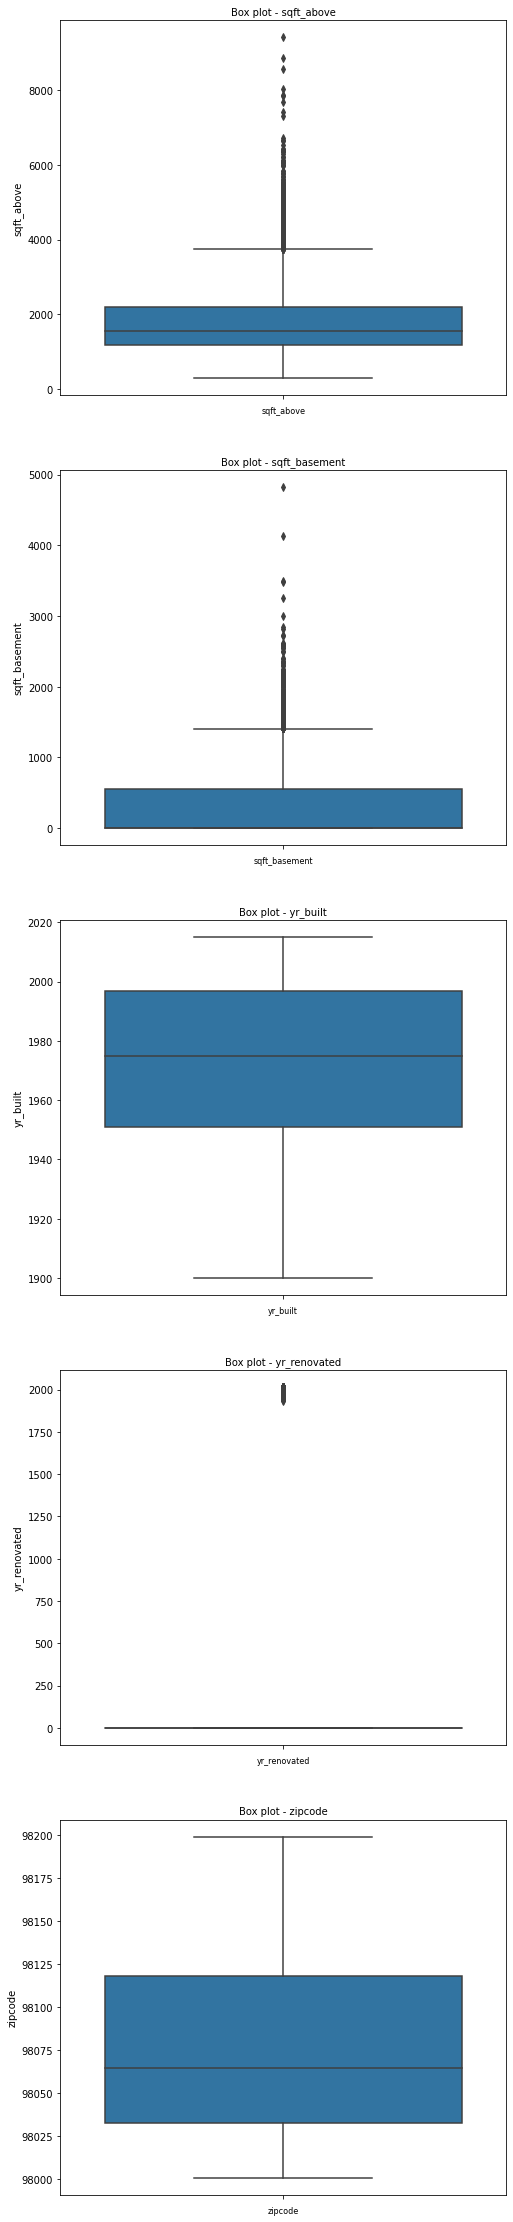

In [14]:
col_names = ['sqft_above','sqft_basement', 'yr_built', 'yr_renovated','zipcode']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = house[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

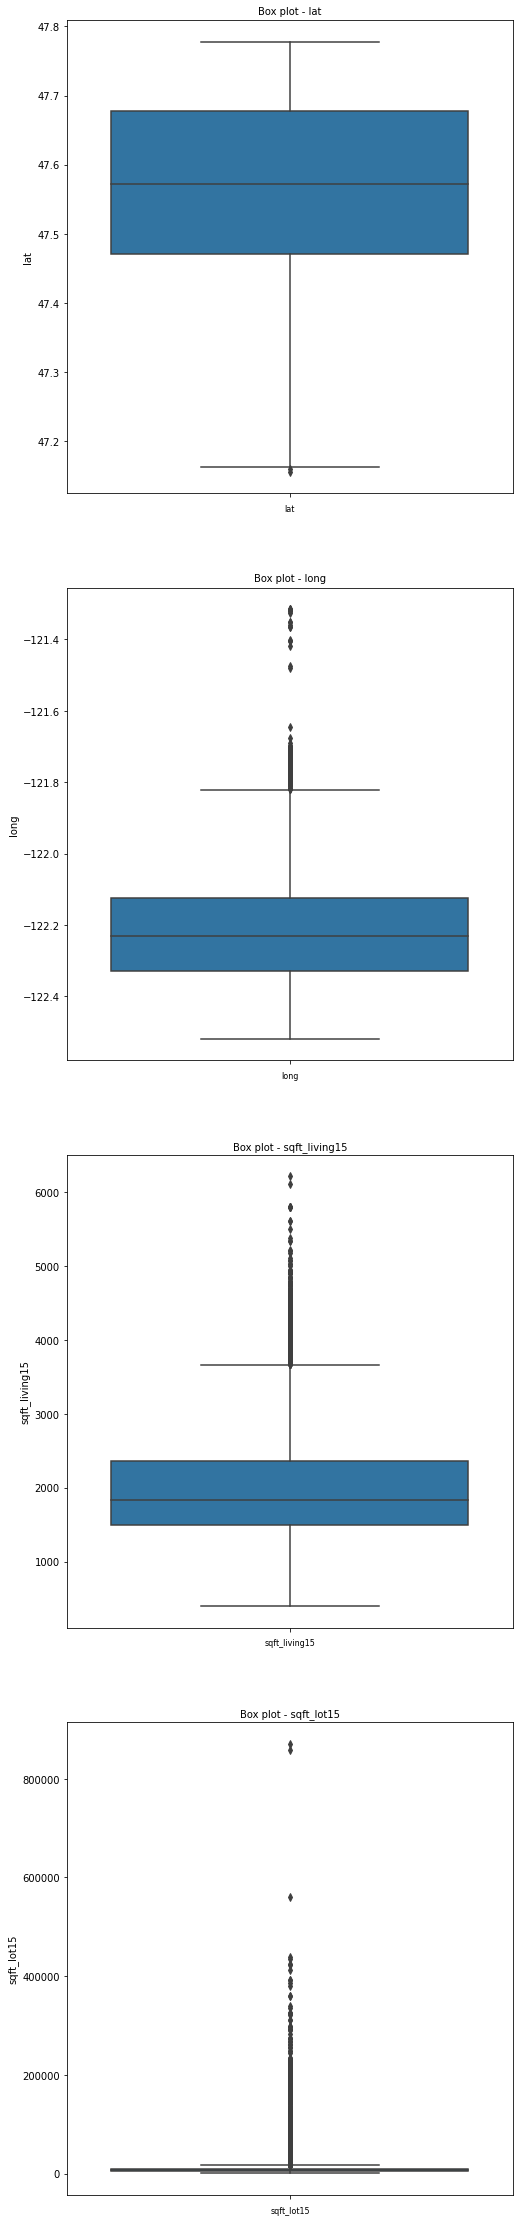

In [15]:
col_names = ['lat','long', 'sqft_living15', 'sqft_lot15']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = house[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [16]:
''' col_names = house.columns
Q1 = []
Q3 = []
IQR = []
for i, col_val in enumerate(col_names):
  Q1_value = house[col_val].quantile(.25)
  Q3_value = house[col_val].quantile(.75)
  IQR_value = Q3_value - Q1_value
  Q1.append(Q1_value)
  Q3.append(Q3_value)
  IQR.append(IQR_value)

IQR ''' #This method is ok, but there's a shorter method below since alll columns are numerical.

' col_names = house.columns\nQ1 = []\nQ3 = []\nIQR = []\nfor i, col_val in enumerate(col_names):\n  Q1_value = house[col_val].quantile(.25)\n  Q3_value = house[col_val].quantile(.75)\n  IQR_value = Q3_value - Q1_value\n  Q1.append(Q1_value)\n  Q3.append(Q3_value)\n  IQR.append(IQR_value)\n\nIQR '

In [17]:
Quantile_1 = house.quantile(.25)
Quantile_3 = house.quantile(.75)
IQR_values = Quantile_3 - Quantile_1

anomalies = ((house < Quantile_1 - 1.5* IQR_values) | (house > Quantile_3 + 1.5 * IQR_values)).sum()
anomalies

price            1159
bedrooms          546
bathrooms         571
sqft_living       572
sqft_lot         2425
floors              0
waterfront        163
view             2124
condition          30
grade            1911
sqft_above        611
sqft_basement     496
yr_built            0
yr_renovated      914
zipcode             0
lat                 2
long              256
sqft_living15     544
sqft_lot15       2194
dtype: int64

In [18]:
percent_anomalies = (anomalies.sum() / house.shape[0])*100
percent_anomalies

67.17253504835054

The outliers seem like reasonable data that cannot be removed as this would affect the analysis, since the rows involved are roughly 67% of the data. Furthermore, the sqft_living column seems to have the same pattern of data as sqft_living15 (the same can be seen in sqft_lot15 and sqft_lot). This could mean that they are highly correlated.

### Summary Statistics

In [19]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [20]:
# Central Tendancies

# mean
col_names = house.columns

for i, col_val in enumerate(col_names):
  print('The mean of ' + str(col_val) + ' is ' + str(house[col_val].mean()))

# mean of longitudes is negative, showing that the areas under review are in the Western hemisphere of the globe
# They are on the westside of the Prime Meridian and the co-ordinates relate to the 'Americas'

The mean of price is 540182.1587933188
The mean of bedrooms is 3.37084162309721
The mean of bathrooms is 2.1147573219821405
The mean of sqft_living is 2079.8997362698374
The mean of sqft_lot is 15106.967565816869
The mean of floors is 1.4943089807060566
The mean of waterfront is 0.007541757275713691
The mean of view is 0.23430342849211122
The mean of condition is 3.4094295100171195
The mean of grade is 7.656873178179799
The mean of sqft_above is 1788.3906907879516
The mean of sqft_basement is 291.5090454818859
The mean of yr_built is 1971.0051357978994
The mean of yr_renovated is 84.40225790033776
The mean of zipcode is 98077.93980474715
The mean of lat is 47.56005251931704
The mean of long is -122.21389640494083
The mean of sqft_living15 is 1986.552491556008
The mean of sqft_lot15 is 12768.455651691113


In [21]:
# median

for i, col_val in enumerate(col_names):
  print('The median of ' + str(col_val) + ' is ' + str(house[col_val].median()))

# The median of the longitudes show that the continent being observed is the American continent.

The median of price is 450000.0
The median of bedrooms is 3.0
The median of bathrooms is 2.25
The median of sqft_living is 1910.0
The median of sqft_lot is 7618.0
The median of floors is 1.5
The median of waterfront is 0.0
The median of view is 0.0
The median of condition is 3.0
The median of grade is 7.0
The median of sqft_above is 1560.0
The median of sqft_basement is 0.0
The median of yr_built is 1975.0
The median of yr_renovated is 0.0
The median of zipcode is 98065.0
The median of lat is 47.5718
The median of long is -122.23
The median of sqft_living15 is 1840.0
The median of sqft_lot15 is 7620.0


In [22]:
# mode

for i, col_val in enumerate(col_names):
  print('The mode of ' + str(col_val) + ' is ' + str(house[col_val].mode()))

# The modes are unimodal showing that the data was gathered from the same population.

The mode of price is 0    350000.0
1    450000.0
dtype: float64
The mode of bedrooms is 0    3
dtype: int64
The mode of bathrooms is 0    2.5
dtype: float64
The mode of sqft_living is 0    1300
dtype: int64
The mode of sqft_lot is 0    5000
dtype: int64
The mode of floors is 0    1.0
dtype: float64
The mode of waterfront is 0    0
dtype: int64
The mode of view is 0    0
dtype: int64
The mode of condition is 0    3
dtype: int64
The mode of grade is 0    7
dtype: int64
The mode of sqft_above is 0    1300
dtype: int64
The mode of sqft_basement is 0    0
dtype: int64
The mode of yr_built is 0    2014
dtype: int64
The mode of yr_renovated is 0    0
dtype: int64
The mode of zipcode is 0    98103
dtype: int64
The mode of lat is 0    47.5322
1    47.5491
2    47.6624
3    47.6846
dtype: float64
The mode of long is 0   -122.29
dtype: float64
The mode of sqft_living15 is 0    1540
dtype: int64
The mode of sqft_lot15 is 0    5000
dtype: int64


In [23]:
# range

for i, col_val in enumerate(col_names):
  print('The range of ' + str(col_val) + ' is ' + str(house[col_val].max()-house[col_val].min()))

The range of price is 7625000.0
The range of bedrooms is 33
The range of bathrooms is 8.0
The range of sqft_living is 13250
The range of sqft_lot is 1650839
The range of floors is 2.5
The range of waterfront is 1
The range of view is 4
The range of condition is 4
The range of grade is 12
The range of sqft_above is 9120
The range of sqft_basement is 4820
The range of yr_built is 115
The range of yr_renovated is 2015
The range of zipcode is 198
The range of lat is 0.621699999999997
The range of long is 1.2039999999999935
The range of sqft_living15 is 5811
The range of sqft_lot15 is 870549


In [24]:
# standard deviation

for i, col_val in enumerate(col_names):
  print('The standard deviation of ' + str(col_val) + ' is ' + str(house[col_val].std()))

# variables with higher range showcase higher standard deviation from the mean.

The standard deviation of price is 367362.23171800975
The standard deviation of bedrooms is 0.9300618311474632
The standard deviation of bathrooms is 0.7701631572177287
The standard deviation of sqft_living is 918.4408970468115
The standard deviation of sqft_lot is 41420.51151513528
The standard deviation of floors is 0.5399888951423824
The standard deviation of waterfront is 0.0865171977279032
The standard deviation of view is 0.7663175692736397
The standard deviation of condition is 0.6507430463662665
The standard deviation of grade is 1.1754587569743042
The standard deviation of sqft_above is 828.0909776519151
The standard deviation of sqft_basement is 442.57504267744406
The standard deviation of yr_built is 29.373410802390172
The standard deviation of yr_renovated is 401.6792400190783
The standard deviation of zipcode is 53.505026257473695
The standard deviation of lat is 0.1385637102419246
The standard deviation of long is 0.14082834238139227
The standard deviation of sqft_living1

In [25]:
# variance

for i, col_val in enumerate(col_names):
  print('The variance of ' + str(col_val) + ' is ' + str(house[col_val].var()))

# As expected, variables with higher standard deviation, also have higher variance.

The variance of price is 134955009292.83669
The variance of bedrooms is 0.8650150097573724
The variance of bathrooms is 0.5931512887355798
The variance of sqft_living is 843533.6813681519
The variance of sqft_lot is 1715658774.1754541
The variance of floors is 0.29158800687709074
The variance of waterfront is 0.007485225502689098
The variance of view is 0.5872426169774596
The variance of condition is 0.42346651239404876
The variance of grade is 1.3817032893475767
The variance of sqft_above is 685734.6672685045
The variance of sqft_basement is 195872.66840094145
The variance of yr_built is 862.7972621659717
The variance of yr_renovated is 161346.2118623043
The variance of zipcode is 2862.7878348129493
The variance of lat is 0.01919990179600804
The variance of long is 0.019832622017890645
The variance of sqft_living15 is 469761.23994532274
The variance of sqft_lot15 is 745518225.3404043


In [26]:
# skewness

for i, col_val in enumerate(col_names):
  print('The skewness of ' + str(col_val) + ' is ' + str(house[col_val].skew()))
  
# Only year built and latitude have negative skewness

The skewness of price is 4.021715573048684
The skewness of bedrooms is 1.97429953543601
The skewness of bathrooms is 0.5111075733474171
The skewness of sqft_living is 1.471555426802092
The skewness of sqft_lot is 13.060018959031755
The skewness of floors is 0.616176721157611
The skewness of waterfront is 11.385107942339081
The skewness of view is 3.395749593248714
The skewness of condition is 1.0328046374434587
The skewness of grade is 0.7711032007576067
The skewness of sqft_above is 1.4466644733818372
The skewness of sqft_basement is 1.5779650555996247
The skewness of yr_built is -0.46980539881436767
The skewness of yr_renovated is 4.549493366993928
The skewness of zipcode is 0.4056612082396646
The skewness of lat is -0.4852704765380861
The skewness of long is 0.8850529834328087
The skewness of sqft_living15 is 1.1081812758966967
The skewness of sqft_lot15 is 9.506743246764398


In [27]:
# kurtosis

for i, col_val in enumerate(col_names):
  print('The kurtosis of ' + str(col_val) + ' is ' + str(house[col_val].kurt()))

# Only floors, year built, zipcode and latitude have negative kurtosis

The kurtosis of price is 34.522444410072566
The kurtosis of bedrooms is 49.06365318170099
The kurtosis of bathrooms is 1.2799024441754554
The kurtosis of sqft_living is 5.24309298981711
The kurtosis of sqft_lot is 285.0778196973658
The kurtosis of floors is -0.4847229368298285
The kurtosis of waterfront is 127.63249356537696
The kurtosis of view is 10.893021684601504
The kurtosis of condition is 0.5257635652845423
The kurtosis of grade is 1.1909320773987657
The kurtosis of sqft_above is 3.40230362139787
The kurtosis of sqft_basement is 2.7155742114129353
The kurtosis of yr_built is -0.657407504733527
The kurtosis of yr_renovated is 18.701152117599058
The kurtosis of zipcode is -0.8534788732101246
The kurtosis of lat is -0.6763130016065335
The kurtosis of long is 1.0495008872914617
The kurtosis of sqft_living15 is 1.5970958104616884
The kurtosis of sqft_lot15 is 150.76311004626973


### Univariate Analysis Recommendation

Most of the skewness of the data is positive, indicating a mostly positively skewed dataset on most variables. This means that most distributions have longer tails to the right i.e. right-skewed / leptokurtic. Same goes for kurtosis as The data has mostly positive kurtosis indicating that most variables distributions have heavier tails and taller peaks than the normal distribution.

## BIVARIATE ANALYSIS

In [28]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [29]:
sns.pairplot(house, height=2)

In [ ]:
# Thers's too many variables to see the pairplot properly, so lets use a heatmap.
plt.figure(figsize=(20,10))
sns.heatmap(house.corr(), annot= True)

### Bivariate Analysis Recommendation

As can be seen from the correlation heatmap, our target variable seems to have moderate to somewhat strong correlation with bathrooms, sqft_living, grade, sqft_above and sqft_living15, with all being above 0.5. These could be the variables that mostly affect the price of the house and will be investigated when designing our model and coming up with our predictions. Furthermore, as was discovered in the Univariate Analysis, it has been confirmed that the sqft_living and sqft_living15 are highly correlated (0.76) and sqft_lot and sqft_lot15 are also highly correlated(0.72)

## EXPLORATORY DATA ANALYSIS

In [ ]:
# In this section, we'll try discover some relationships between price and the columns we discovered to be moderately,
# to strongly correlated to it, i.e. bathrooms, sqft_living,grade,sqft_above and sqft_living15.

correlated = house[['price','bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
sns.pairplot(correlated)

# From below we can see the positive linear correlation between the price and the said features.
# The features also have strong positive correlation with each other.

In [ ]:
house['price'].hist(bins=100)

# Our target variable has been confirmed to be right tailed and not normally distributed.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

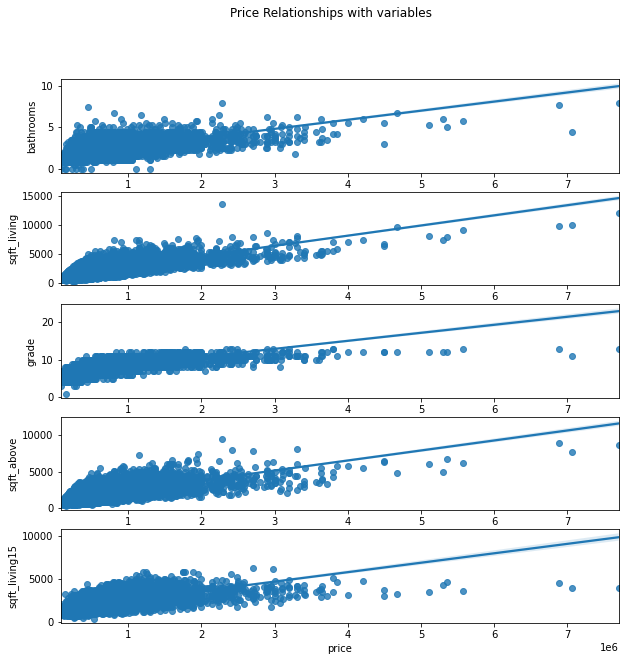

In [33]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize=(10, 10))
fig.suptitle('Price Relationships with variables')
sns.regplot(house.price, house.bathrooms, ax=ax1)
sns.regplot(house.price, house.sqft_living, ax=ax2)
sns.regplot(house.price, house.grade, ax=ax3)
sns.regplot(house.price, house.sqft_above, ax=ax4)
sns.regplot(house.price, house.sqft_living15, ax=ax5)

# The plots below show the positive linear relationship we had discovered.

# MODELING

## PREPARATION

In [34]:
# Importing some of the libraries we might use

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet


# Setting the warnings that may appear in our modelling off
import warnings
warnings.filterwarnings('ignore')

# Setting the pandas warning for chained assignments off, the default is usually on.
pd.options.mode.chained_assignment = None

In [35]:
# SPLITTING DATA INTO TEST AND TRAIN SETS INTO GLOBAL VARIABLES

X = house.drop(columns= ['price'])
y = house.price


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 10)

## MULTIPLE LINEAR REGRESSION

### Checking Multicolinearity

In [36]:
house_correlation = house.corr()

# Let's use these correlations to compute the VIF score for each variable.

pd.DataFrame(np.linalg.inv(house_correlation.values), index = house_correlation.index, 
             columns=house_correlation.columns)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,3.330586,0.301852,-0.287446,-1.058380e+00,-0.048219,-0.032777,-0.457309,-0.367765,-0.155831,-1.022917,-4.089068e-01,-9.316871e-02,0.698363,-0.072194,0.282599,-0.757298,0.274458,-0.134692,0.094677
bedrooms,0.301852,1.679420,-0.487222,-2.935008e-01,0.044991,0.046724,0.021789,0.080781,-0.064890,0.214341,-7.338456e-01,-3.969295e-01,0.197791,0.038911,0.105724,-0.017845,0.042269,0.013006,0.093980
bathrooms,-0.287446,-0.487222,3.375600,-4.954651e+00,-0.019966,-0.672246,0.049228,-0.009905,-0.123571,-0.179722,3.317089e+00,1.361152e+00,-0.996051,-0.253551,0.017406,0.024402,0.030368,0.103757,0.063300
sqft_living,-1.052110,-0.293914,-4.958625,-3.365476e+13,-0.107501,0.524832,0.593069,-0.474494,-0.311749,-0.467869,3.034404e+13,1.621744e+13,1.441378,0.088434,-0.233227,0.262594,-0.212666,-0.936343,-0.215230
sqft_lot,-0.048219,0.044991,-0.019966,-1.078762e-01,2.103220,0.045737,0.033931,-0.053673,0.032817,-0.039042,-8.223931e-02,1.811909e-02,0.088652,0.022488,-0.006702,0.064330,-0.137136,0.165894,-1.460689
floors,-0.032777,0.046724,-0.672246,5.213931e-01,0.045737,2.012230,-0.000780,-0.037007,0.091206,-0.220784,-9.603473e-01,3.701780e-01,-0.488352,-0.079893,-0.173547,-0.120184,0.161366,0.273942,0.071727
waterfront,-0.457309,0.021789,0.049228,5.944617e-01,0.033931,-0.000780,1.266557,-0.442049,0.008726,0.189692,-4.610539e-01,-2.073544e-01,-0.116940,-0.055490,-0.016251,0.113878,-0.010247,0.072946,-0.031469
view,-0.367765,0.080781,-0.009905,-4.761005e-01,-0.053673,-0.037007,-0.442049,1.475769,-0.004268,-0.072286,6.187907e-01,3.941484e-02,0.074506,-0.032265,-0.171884,0.202108,0.041202,-0.310742,-0.017947
condition,-0.155831,-0.064890,-0.123571,-3.134202e-01,0.032817,0.091206,0.008726,-0.004268,1.256766,-0.006594,4.015650e-01,8.162074e-02,0.528874,0.210050,0.148046,0.099106,-0.019870,0.082163,-0.032684
grade,-1.022917,0.214341,-0.179722,-4.612042e-01,-0.039042,-0.220784,0.189692,-0.072286,-0.006594,3.731213,-7.755239e-01,-7.888923e-02,-0.853468,-0.049250,-0.003473,-0.098281,0.309540,-0.870235,0.042796


In [37]:
# VIF scores should start from 1 and anything beyond 5 shows high multicollinearity.
# sqft_living, sqft_above and sqft_basement have negative values, hence need to be removed from the test.

mlreg_house = house.drop(columns=['sqft_living', 'sqft_above', 'sqft_basement'])
new_house_corr = mlreg_house.corr()

pd.DataFrame(np.linalg.inv(new_house_corr.values), index = new_house_corr.index, 
             columns=new_house_corr.columns)

# We can notice that after removing those features, the VIF scores of the other features and
# especially our target variable decreased, approaching 1 (which is the point at which there is no correlation at all).


,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,2.965985,0.022224,-0.661931,-0.090582,-0.058633,-0.431483,-0.351414,-0.139270,-1.313528,0.763069,-0.066250,0.225363,-0.646223,0.190570,-0.504934,0.039548
bedrooms,0.022224,1.459711,-0.802361,0.014973,0.072296,0.044082,0.078489,-0.058799,0.003709,0.248235,0.042734,0.059238,0.058608,-0.005877,-0.259649,0.052686
bathrooms,-0.661931,-0.802361,2.842390,-0.050328,-0.457293,0.088981,-0.072007,-0.141727,-0.413052,-0.925240,-0.251359,-0.055153,0.092025,0.030331,-0.216418,0.011924
sqft_lot,-0.090582,0.014973,-0.050328,2.097134,0.021360,0.035761,-0.044791,0.037853,-0.078574,0.095785,0.023525,-0.012133,0.081347,-0.154504,0.117557,-1.467559
floors,-0.058633,0.072296,-0.457293,0.021360,1.617813,-0.020450,0.092400,0.149543,-0.347313,-0.490835,-0.073110,-0.155220,-0.036779,0.015420,0.149985,0.059289
waterfront,-0.431483,0.044082,0.088981,0.035761,-0.020450,1.263550,-0.436183,0.010684,0.204477,-0.121910,-0.055563,-0.010971,0.110146,-0.011972,0.093820,-0.028032
view,-0.351414,0.078489,-0.072007,-0.044791,0.092400,-0.436183,1.433140,-0.023684,-0.024651,0.073915,-0.034609,-0.176630,0.172453,0.090698,-0.262221,-0.012689
condition,-0.139270,-0.058799,-0.141727,0.037853,0.149543,0.010684,-0.023684,1.247691,0.022029,0.526965,0.208854,0.147386,0.083063,0.004325,0.113206,-0.028938
grade,-1.313528,0.003709,-0.413052,-0.078574,-0.347313,0.204477,-0.024651,0.022029,3.470999,-0.803800,-0.042795,-0.043054,0.010631,0.204905,-1.191702,-0.003446
yr_built,0.763069,0.248235,-0.925240,0.095785,-0.490835,-0.121910,0.073915,0.526965,-0.803800,2.565472,0.517846,0.326681,0.133278,-0.435719,0.113420,-0.004258


### Building the Model

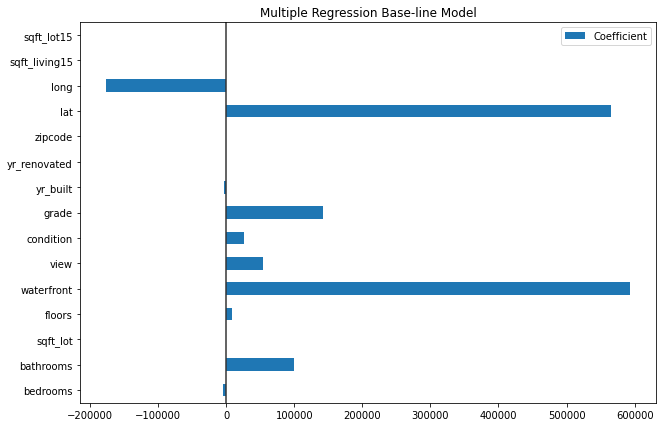

In [38]:
# redefining the new features

X_new = mlreg_house.drop(columns= ['price'])
y_new = mlreg_house.price

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y_new, test_size= 0.3, random_state= 10)

X_train_mlreg = X_train_new.copy(deep=True)
X_test_mlreg = X_test_new.copy(deep=True)
y_train_mlreg = y_train_new.copy(deep=True)
y_test_mlreg = y_test_new.copy(deep=True)

ml_regressor = LinearRegression()
ml_regressor.fit(X_train_mlreg,y_train_mlreg)

coeff_ml_regressor = pd.DataFrame(ml_regressor.coef_, X_new.columns, columns=['Coefficient'])
coeff_ml_regressor.plot(kind='barh', figsize=(20,7))
plt.title('Multiple Regression Base-line Model')
plt.axvline(x=0, color='.2')
plt.subplots_adjust(left=.5)

# The below means that a unit increase in waterfront leads to the highest increase in price
# and a unit increase in longitude leads to the highest decrease in price.

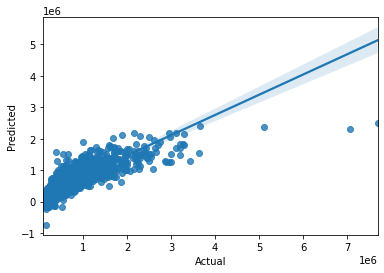

In [39]:
# Making Predictions

y_pred_mlreg = ml_regressor.predict(X_test_mlreg)

df_mlreg = pd.DataFrame({'Actual': y_test_mlreg, 'Predicted': y_pred_mlreg})

sns.regplot(df_mlreg.Actual, df_mlreg.Predicted)

In [40]:
# From the above, the predictions seem to be okay for most of the data, except the extreme outliers 
# of the most expensive houses.

# Evaluating the Algorithm

mae_mlreg = metrics.mean_absolute_error(y_test_mlreg, y_pred_mlreg)
mse_mlreg = metrics.mean_squared_error(y_test_mlreg, y_pred_mlreg)
rmse_mlreg = np.sqrt(metrics.mean_squared_error(y_test_mlreg, y_pred_mlreg))

ratio_mlreg = (rmse_mlreg / mlreg_house.price.mean()) * 100

r2_score_mlreg = r2_score(y_test_mlreg, y_pred_mlreg)

print('Mean Absolute Error:', mae_mlreg)
print('Mean Squared Error:', mse_mlreg)
print('Root Mean Squared Error:', rmse_mlreg)
print('Percentage of RMSE to mean is: ' +str(ratio_mlreg) + ' %')
print('R score:', r2_score_mlreg)

Mean Absolute Error: 128769.73618292823
Mean Squared Error: 46523147831.04149
Root Mean Squared Error: 215692.2525985611
Percentage of RMSE to mean is: 39.929540264784634 %
R score: 0.663090799912305


### Multiple Linear Regression Model Recommendation

This will be the basis to compare the baseline models of the other regression models. This model is not very accurate because the Percentage of RMSE to mean is 39%. It still made reasonably good predictions as can be seen in the plot above sice the R-score was not below the wildly used cut-off point of 0.60 for a bad model. This inaccuracy could have been caused by:
1. The factor that the data does not follow a normal distribution (as we had seen in the Analysis section)
2. Poor features, i.e., the features we used may not have had a high enough correlation to the values we were trying to predict.

## RIDGE REGRESSION

### Building Non-Normalized Model

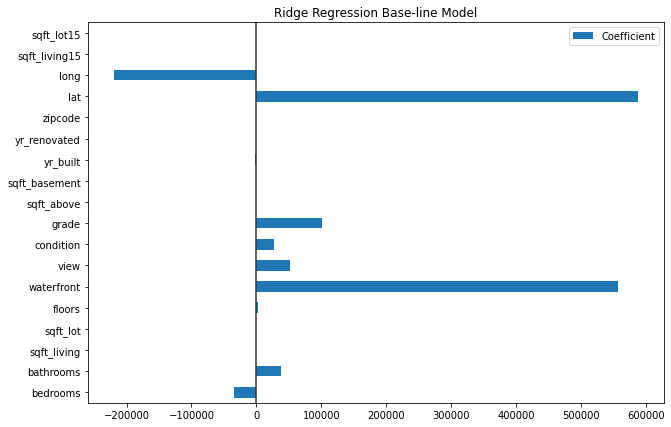

In [41]:
X_train_ridge = X_train.copy(deep=True)
X_test_ridge = X_test.copy(deep=True)
y_train_ridge = y_train.copy(deep=True)
y_test_ridge = y_test.copy(deep=True)

ridge_regressor = Ridge()
ridge_regressor.fit(X_train_ridge,y_train_ridge)

coeff_ridge = pd.DataFrame(ridge_regressor.coef_, X.columns, columns=['Coefficient'])
coeff_ridge.plot(kind='barh', figsize=(20,7))
plt.title('Ridge Regression Base-line Model')
plt.axvline(x=0, color='.2')
plt.subplots_adjust(left=.5)

# without normalization, the results are different to the Multiple Linear Regression Model
# latitude now seems to have more weight

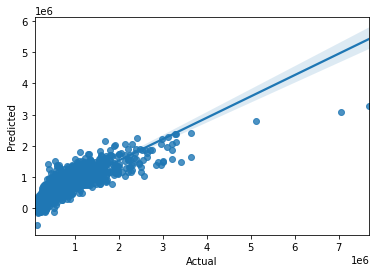

In [42]:
# Making Predictions

y_pred_ridge = ridge_regressor.predict(X_test_ridge)

df_ridge = pd.DataFrame({'Actual': y_test_ridge, 'Predicted': y_pred_ridge})

sns.regplot(df_ridge.Actual, df_ridge.Predicted)

In [43]:
# From the above, the predictions seem to be similar to the Multiple Linear Regression Model.

# Evaluating the Algorithm

mae_ridge = metrics.mean_absolute_error(y_test_ridge, y_pred_ridge)
mse_ridge = metrics.mean_squared_error(y_test_ridge, y_pred_ridge)
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test_ridge, y_pred_ridge))

ratio_ridge = (rmse_ridge / house.price.mean()) * 100

r2_score_ridge = r2_score(y_test_ridge, y_pred_ridge)

print('Mean Absolute Error:', mae_ridge)
print('Mean Squared Error:', mse_ridge)
print('Root Mean Squared Error:', rmse_ridge)
print('Percentage of RMSE to mean is: ' +str(ratio_ridge) + ' %')
print('R score:', r2_score_ridge)

# This model is not very accurate because the Percentage of RMSE to mean is 37%, 
# but is better than the Multiple Linear Model
# R Score is also better than that of the Multiple Linear Regression Model.

Mean Absolute Error: 123069.86794199176
Mean Squared Error: 40081120264.11176
Root Mean Squared Error: 200202.69794413802
Percentage of RMSE to mean is: 37.0620715040569 %
R score: 0.7097423799472449


### Building Normalized Model

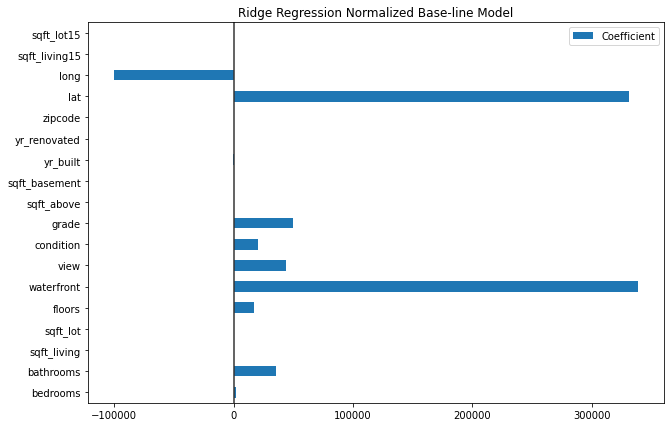

In [44]:
X_train_Ridge = X_train.copy(deep=True)
X_test_Ridge = X_test.copy(deep=True)
y_train_Ridge = y_train.copy(deep=True)
y_test_Ridge = y_test.copy(deep=True)

Ridge_regressor = Ridge(normalize=True)
Ridge_regressor.fit(X_train_Ridge,y_train_Ridge)

coeff_Ridge = pd.DataFrame(Ridge_regressor.coef_, X.columns, columns=['Coefficient'])
coeff_Ridge.plot(kind='barh', figsize=(20,7))
plt.title('Ridge Regression Normalized Base-line Model')
plt.axvline(x=0, color='.2')
plt.subplots_adjust(left=.5)

# This model has some differences as can be seen in the bedrooms, bathrooms and floors coefficents
# as compared to the non-normalized model.
# Furthermore, the waterfront coefficient seems to now have a similar effect to the price as the
# latitude coefficient.

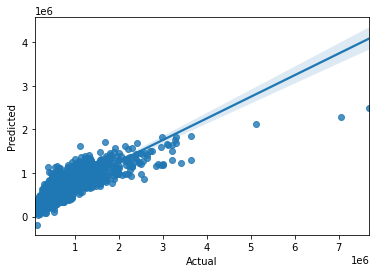

In [45]:
# Making Predictions

y_pred_Ridge = Ridge_regressor.predict(X_test_Ridge)

df_Ridge = pd.DataFrame({'Actual': y_test_Ridge, 'Predicted': y_pred_Ridge})

sns.regplot(df_Ridge.Actual, df_Ridge.Predicted)


In [46]:
# The predictions though, still seem to be similar to the previous 2 models.

# Evaluating the Algorithm

mae_Ridge = metrics.mean_absolute_error(y_test_Ridge, y_pred_Ridge)
mse_Ridge = metrics.mean_squared_error(y_test_Ridge, y_pred_Ridge)
rmse_Ridge = np.sqrt(metrics.mean_squared_error(y_test_Ridge, y_pred_Ridge))

ratio_Ridge = (rmse_Ridge / house.price.mean()) * 100

r2_score_Ridge = r2_score(y_test_Ridge, y_pred_Ridge)

print('Mean Absolute Error:', mae_Ridge)
print('Mean Squared Error:', mse_Ridge)
print('Root Mean Squared Error:', rmse_Ridge)
print('Percentage of RMSE to mean is: ' +str(ratio_Ridge) + ' %')
print('R score:', r2_score_Ridge)

# The RSME and The R score are worse than the first 2 models.

Mean Absolute Error: 130468.2760171499
Mean Squared Error: 51309876931.98804
Root Mean Squared Error: 226516.83586874517
Percentage of RMSE to mean is: 41.933416752368835 %
R score: 0.6284264844559815


### Ridge Regression Recommendation

The non-normalized Ridge regression model performed the best so far, however, when normlizing the data, in order to carry out proper predictions, the results are the worst so far. In addition, RMSE tells you how concentrated the data is around the line of best fit, as it describe how far spread out the residuals are. A higher RMSE percentage compared to the mean (typically more than 10%) means the model is not very accurate. For Ridge, Lasso and Elastic Net Regression Models, since they do not assume data is normal, unlike Multiple Linear Regression, this high RMSE could be explained by possible poor features, i.e., the features we used may not have had a high enough correlation to the values we were trying to predict.

## LASSO REGRESSION

### Building Non-Normalized Model

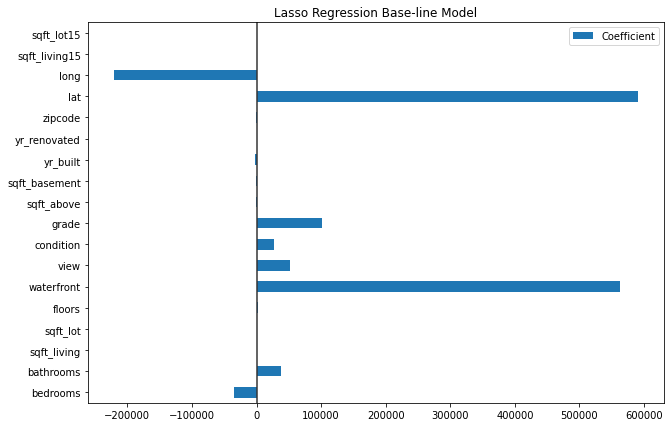

In [47]:
X_train_lasso = X_train.copy(deep=True)
X_test_lasso = X_test.copy(deep=True)
y_train_lasso = y_train.copy(deep=True)
y_test_lasso = y_test.copy(deep=True)

lasso_regressor = Lasso()
lasso_regressor.fit(X_train_lasso,y_train_lasso)

coeff_lasso = pd.DataFrame(lasso_regressor.coef_, X.columns, columns=['Coefficient'])
coeff_lasso.plot(kind='barh', figsize=(20,7))
plt.title('Lasso Regression Base-line Model')
plt.axvline(x=0, color='.2')
plt.subplots_adjust(left=.5)

# We can see differences in yr_built and bathrooms from the Ridge Models.

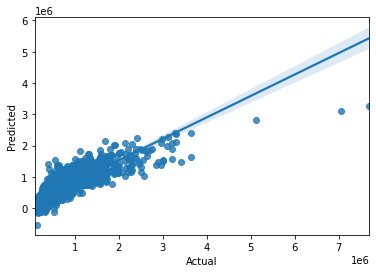

In [48]:
# Making Predictions

y_pred_lasso = lasso_regressor.predict(X_test_lasso)

df_lasso = pd.DataFrame({'Actual': y_test_lasso, 'Predicted': y_pred_lasso})

sns.regplot(df_lasso.Actual, df_lasso.Predicted)

In [49]:
# The predictions though, still seem to be similar to the previous 3 models.

# Evaluating the Algorithm

mae_lasso = metrics.mean_absolute_error(y_test_lasso, y_pred_lasso)
mse_lasso = metrics.mean_squared_error(y_test_lasso, y_pred_lasso)
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test_lasso, y_pred_lasso))

ratio_lasso = (rmse_lasso / house.price.mean()) * 100
r2_score_lasso = r2_score(y_test_lasso, y_pred_lasso)

print('Mean Absolute Error:', mae_lasso)
print('Mean Squared Error:', mse_lasso)
print('Root Mean Squared Error:', rmse_lasso)
print('Percentage of RMSE to mean is: ' +str(ratio_lasso) + ' %')
print('R score:', r2_score_lasso)

# The R score is similar to the normalized Ridge model.
# Furthermore, the RSME is the best yet

Mean Absolute Error: 123083.12389005191
Mean Squared Error: 40073222532.75371
Root Mean Squared Error: 200182.9726344219
Percentage of RMSE to mean is: 37.058419900723656 %
R score: 0.7097995733762883


### Building Normalized Model

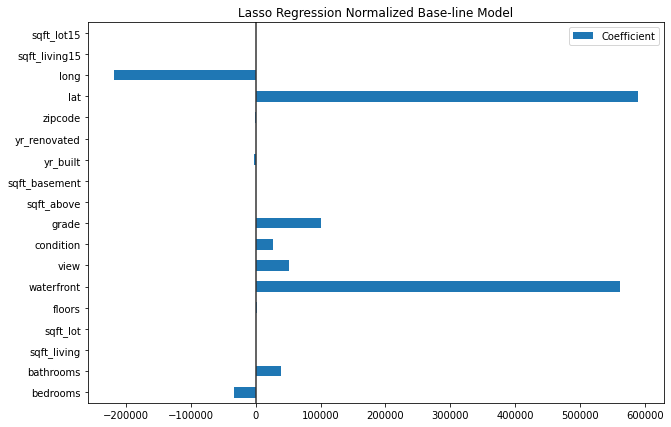

In [50]:
X_train_Lasso = X_train.copy(deep=True)
X_test_Lasso = X_test.copy(deep=True)
y_train_Lasso = y_train.copy(deep=True)
y_test_Lasso = y_test.copy(deep=True)

Lasso_regressor = Lasso(normalize= True)
Lasso_regressor.fit(X_train_Lasso,y_train_Lasso)

coeff_Lasso = pd.DataFrame(Lasso_regressor.coef_, X.columns, columns=['Coefficient'])
coeff_Lasso.plot(kind='barh', figsize=(20,7))
plt.title('Lasso Regression Normalized Base-line Model')
plt.axvline(x=0, color='.2')
plt.subplots_adjust(left=.5)

# Similar to the Lasso Non-normalized plot.

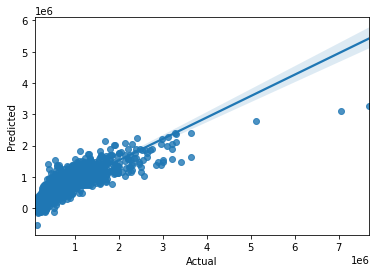

In [51]:
y_pred_Lasso = Lasso_regressor.predict(X_test_Lasso)

df_Lasso = pd.DataFrame({'Actual': y_test_Lasso, 'Predicted': y_pred_Lasso})

sns.regplot(df_Lasso.Actual, df_Lasso.Predicted)

In [52]:
# The predictions still seem to be similar to the previous 4 models.

# Evaluating the Algorithm

mae_Lasso = metrics.mean_absolute_error(y_test_Lasso, y_pred_Lasso)
mse_Lasso = metrics.mean_squared_error(y_test_Lasso, y_pred_Lasso)
rmse_Lasso = np.sqrt(metrics.mean_squared_error(y_test_Lasso, y_pred_Lasso))

ratio_Lasso = (rmse_Lasso / house.price.mean()) * 100
r2_score_Lasso = r2_score(y_test_Lasso, y_pred_Lasso)

print('Mean Absolute Error:', mae_Lasso)
print('Mean Squared Error:', mse_Lasso)
print('Root Mean Squared Error:', rmse_Lasso)
print('Percentage of RMSE to mean is: ' +str(ratio_Lasso) + ' %')
print('R score:', r2_score_Lasso)

# The RMSE and R-score is similar to the non-normalized Lasso models.

Mean Absolute Error: 123043.92020203863
Mean Squared Error: 40090162634.646545
Root Mean Squared Error: 200225.27970924787
Percentage of RMSE to mean is: 37.066251902232274 %
R score: 0.7096768973226635


### Lasso Regression Recommendation

Lasso has the best results so far. It has the lowest RSME for both non-normalised and normalised models at 37% (similar to normalised Ridge model). However it performs better on the R-scores, for both models. R-score is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. 0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean. The Lasso Models show that 70% of the data's variance is explained by the models.

## ELASTIC NET REGRESSION

### Building Non-Normalized Model

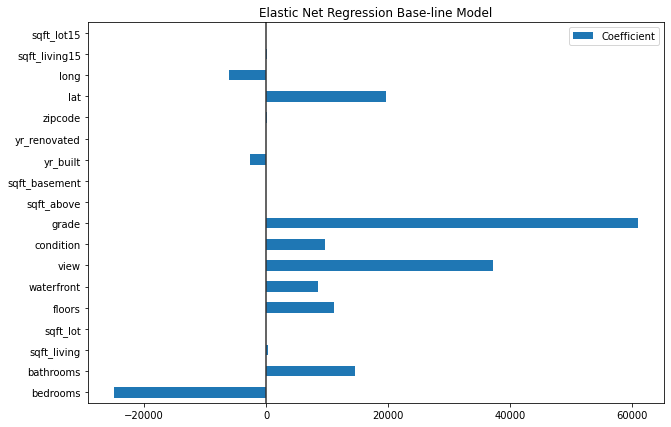

In [53]:
X_train_elastic = X_train.copy(deep=True)
X_test_elastic = X_test.copy(deep=True)
y_train_elastic = y_train.copy(deep=True)
y_test_elastic = y_test.copy(deep=True)

elastic_regressor = ElasticNet()
elastic_regressor.fit(X_train_elastic,y_train_elastic)

coeff_elastic = pd.DataFrame(elastic_regressor.coef_, X.columns, columns=['Coefficient'])
coeff_elastic.plot(kind='barh', figsize=(20,7))
plt.title('Elastic Net Regression Base-line Model')
plt.axvline(x=0, color='.2')
plt.subplots_adjust(left=.5)

# Differences can be seen in long, lat, yr_built, grade, condition, view, waterfront, sqft_living
# and bathrooms and bedrooms features, from the Multiple Linear Model.

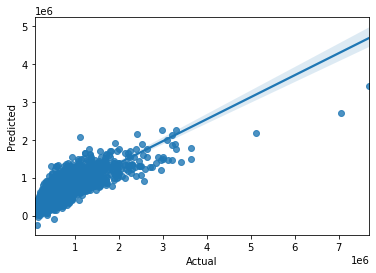

In [54]:
# Making Predictions

y_pred_elastic = elastic_regressor.predict(X_test_elastic)

df_elastic = pd.DataFrame({'Actual': y_test_elastic, 'Predicted': y_pred_elastic})

sns.regplot(df_elastic.Actual, df_elastic.Predicted)

In [55]:
# The predictions still seem to be similar to the previous 5 models.

# Evaluating the Algorithm

mae_elastic = metrics.mean_absolute_error(y_test_elastic, y_pred_elastic)
mse_elastic = metrics.mean_squared_error(y_test_elastic, y_pred_elastic)
rmse_elastic = np.sqrt(metrics.mean_squared_error(y_test_elastic, y_pred_elastic))

ratio_elastic = (rmse_elastic / house.price.mean()) * 100
r2_score_elastic = r2_score(y_test_elastic, y_pred_elastic)

print('Mean Absolute Error:', mae_elastic)
print('Mean Squared Error:', mse_elastic)
print('Root Mean Squared Error:', rmse_elastic)
print('Percentage of RMSE to mean is: ' +str(ratio_elastic) + ' %')
print('R score:', r2_score_elastic)

# It's RMSE and R-score is one of the worst.

Mean Absolute Error: 144304.84846249476
Mean Squared Error: 51757550681.429695
Root Mean Squared Error: 227502.858622545
Percentage of RMSE to mean is: 42.11595198381788 %
R score: 0.6251845412114616


### Building Normalized Model

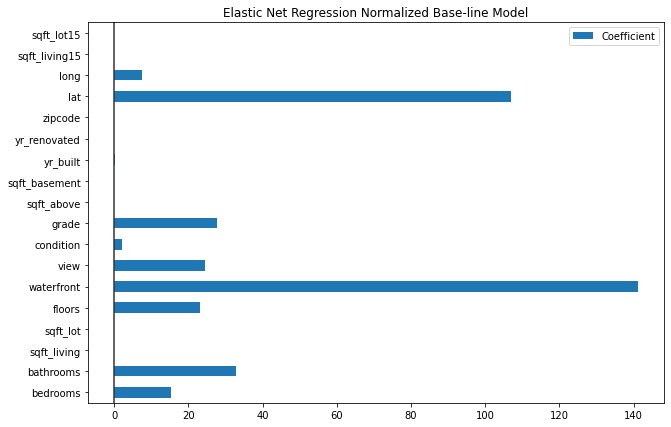

In [56]:
X_train_Elastic = X_train.copy(deep=True)
X_test_Elastic = X_test.copy(deep=True)
y_train_Elastic = y_train.copy(deep=True)
y_test_Elastic = y_test.copy(deep=True)

Elastic_regressor = ElasticNet(normalize= True)
Elastic_regressor.fit(X_train_Elastic,y_train_Elastic)

coeff_Elastic = pd.DataFrame(Elastic_regressor.coef_, X.columns, columns=['Coefficient'])
coeff_Elastic.plot(kind='barh', figsize=(20,7))
plt.title('Elastic Net Regression Normalized Base-line Model')
plt.axvline(x=0, color='.2')
plt.subplots_adjust(left=.5)

# So far, it is the most different plot from them all.

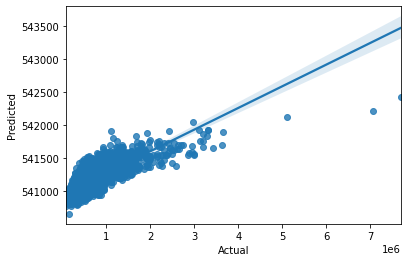

In [57]:
# Making Predictions

y_pred_Elastic = Elastic_regressor.predict(X_test_Elastic)

df_Elastic = pd.DataFrame({'Actual': y_test_Elastic, 'Predicted': y_pred_Elastic})

sns.regplot(df_Elastic.Actual, df_Elastic.Predicted)

In [58]:
# The predictions still seem to be similar to the previous 6 models.

# Evaluating the Algorithm

mae_Elastic = metrics.mean_absolute_error(y_test_Elastic, y_pred_Elastic)
mse_Elastic = metrics.mean_squared_error(y_test_Elastic, y_pred_Elastic)
rmse_Elastic = np.sqrt(metrics.mean_squared_error(y_test_Elastic, y_pred_Elastic))

ratio_Elastic = (rmse_Elastic / house.price.mean()) * 100
r2_score_Elastic = r2_score(y_test_Elastic, y_pred_Elastic)

print('Mean Absolute Error:', mae_Elastic)
print('Mean Squared Error:', mse_Elastic)
print('Root Mean Squared Error:', rmse_Elastic)
print('Percentage of RMSE to mean is: ' +str(ratio_Elastic) + ' %')
print('R score:', r2_score_Elastic)

# This model has the worst RMSE and R-Score values

Mean Absolute Error: 233821.93269265973
Mean Squared Error: 138008030855.80112
Root Mean Squared Error: 371494.3214314334
Percentage of RMSE to mean is: 68.77204575976606 %
R score: 0.0005797662237636558


### Elastic Net Regression Recommendation

Elastic Net performed the worst when compared to all the other models. The RMSEs indicate that the model is not accurate and the Rscore, especially of the normalized model shows that only 0.05% of the variance is explained by the model, which is horrible.

## RESIDUAL PLOTS AND HETEROSCEDASTICITY USING BARTLETT'S TEST

Since Lasso Regression Models have the best RMSES and R-scores, we'll check for heteroskedasticity to help determine which model to use, and perform hyperparameter tuning on it to achieve better results. This test will show why we chose this over the baseline  Multiple Linear Regression

In [59]:
residuals = np.subtract(y_pred_mlreg, y_test_mlreg)
pd.DataFrame(residuals).describe()

,price
count,6.484000e+03
mean,-7.111330e+03
std,2.155916e+05
min,-5.210405e+06
25%,-8.355634e+04
50%,9.367680e+03
75%,9.962803e+04
max,1.208949e+06


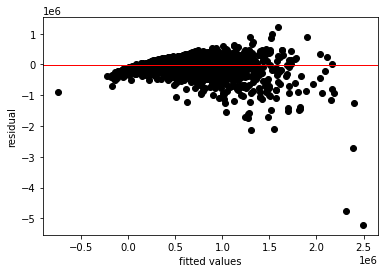

In [60]:
plt.scatter(y_pred_mlreg, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

# The data seems to be cone-shaped showing possibility of heteroskedasticity

In [61]:
# Let's be thorough though, and perform a heteroskedasticity test.
# For this we will use bartlett's test. The test establishes as a null hypothesis that the variance is equal for all our datapoints,
# and the new hypothesis that the variance is different for at least one pair of datapoints.

test_result, p_value = sp.stats.bartlett(y_pred_mlreg, residuals)

# To interpret the results we must compare to a p_value of 0.05

print(p_value)

if (p_value < 0.05):
  print('the variances are unequal, and the model shows heteroskedasicity')
else:
  print('the variances are homogeneous!')

4.298562842915411e-133
the variances are unequal, and the model shows heteroskedasicity


Since the model does not have homogenous variances, as expected since we already knew it was not normalized, we will use the Lasso Regression Model and Tune it accordingly.

## HYPERPARAMETER TUNING LASSO REGRESSION MODEL

In [62]:
# MACHINE LEARNING PIPELINE

from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LassoCV

X_train_ = X_train.copy(deep=True)
X_test_ = X_test.copy(deep=True)
y_train_ = y_train.copy(deep=True)
y_test_ = y_test.copy(deep=True)
X_ = X.copy(deep=True)

preprocessor = StandardScaler()
preprocessor.fit(X_)

def func(x):
  return np.log(x)
def inverse_func(x):
  return np.exp(x)

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=LassoCV(alphas=np.logspace(-10, 10, 21), max_iter=100000),
        func=func,
        inverse_func=inverse_func
    )
)

model.fit(X_train_, y_train_)

# First we verify which value of alpha has been selected.
model[-1].regressor_.alpha_

0.0001

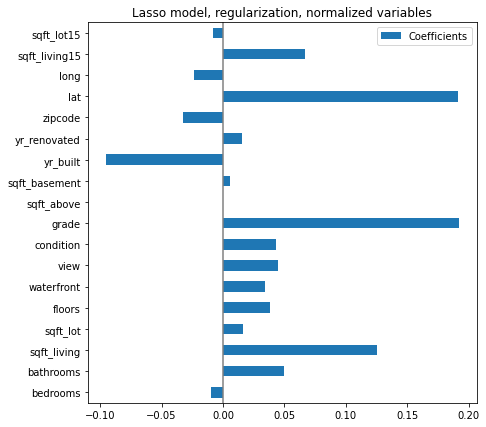

In [63]:
# Then we check the quality of the predictions.

coefs = pd.DataFrame(
    model.named_steps['transformedtargetregressor'].regressor_.coef_,
    columns=['Coefficients'], index=X.columns
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso model, regularization, normalized variables')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

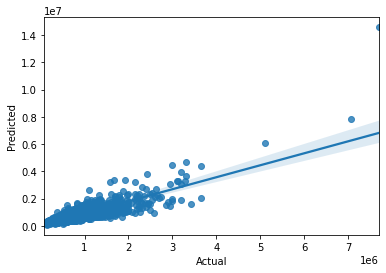

In [64]:
y_pred_ = model.predict(X_test_)

df_ = pd.DataFrame({'Actual': y_test_, 'Predicted': y_pred_})

sns.regplot(df_.Actual, df_.Predicted)

# As can be seen, our prediction values now seem to be much closer to the Actual data.

In [65]:
# Evaluating the Algorithm

mae_ = metrics.mean_absolute_error(y_test_, y_pred_)
mse_ = metrics.mean_squared_error(y_test_, y_pred_)
rmse_ = np.sqrt(metrics.mean_squared_error(y_test_, y_pred_))

ratio_ = (rmse_ / house.price.mean()) * 100
r2_score_ = r2_score(y_test_, y_pred_)

print('Mean Absolute Error:', mae_)
print('Mean Squared Error:', mse_)
print('Root Mean Squared Error:', rmse_)
print('Percentage of RMSE to mean is: ' +str(ratio_) + ' %')
print('R score:', r2_score_)

# The RMSE value is the lowest we have found so far.
# And the R-score is the highest we have found so far

Mean Absolute Error: 109066.94786405917
Mean Squared Error: 38832040872.6661
Root Mean Squared Error: 197058.47069503533
Percentage of RMSE to mean is: 36.480003548290576 %
R score: 0.7187879058464447


# CONCLUSION

The Model above is our chosen model as it has provided the best results after hyperparameter tuning. The Percentage of RMSE to mean is the lowest at 36% (meaning it is the most accurate model we've built) and the R-score is the best at 0.71 (meaning it explains 71% of the variance in the data).

# CHALLENGING THE SOLUTION

## QUANTILE REGRESSION

In [107]:
# We'll compare our best model above with Quantile regression

from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf

X_train_quant = X_train.copy(deep=True)
X_test_quant = X_test.copy(deep=True)
y_train_quant = y_train.copy(deep=True)
y_test_quant = y_test.copy(deep=True)

scaler = StandardScaler()
X_train_quant = scaler.fit_transform(X_train_quant)
X_test_quant = scaler.transform(X_test_quant)

# DataFrame for Train data

df_1 = pd.DataFrame(X_train_quant, columns= X.columns)

target = pd.Series(y_train_quant, name="price")
df_2 =  target.to_frame()
df_2 = df_2.reset_index()
df_2.drop(columns=['index'], inplace=True)

train_data = pd.concat([df_1,df_2], axis=1)
train_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,-0.395866,0.174042,0.029360,-0.092866,0.955279,-0.086749,-0.307711,0.894653,0.279722,0.388316,-0.661944,0.241272,-0.20982,-0.103165,1.311304,0.762125,-0.192371,-0.058234,479000.0
1,-0.395866,0.496804,-0.795392,-0.324085,2.818423,-0.086749,-0.307711,-0.633367,0.279722,-0.527663,-0.661944,1.165062,-0.20982,0.740980,0.832302,-1.227813,-0.930048,-0.313578,477000.0
2,0.665082,0.496804,0.734740,-0.236473,0.955279,-0.086749,-0.307711,-0.633367,-0.566153,1.171719,-0.661944,1.028204,-0.20982,-0.403306,-0.574315,0.167268,0.979234,-0.261006,424950.0
3,0.665082,0.496804,0.647924,-0.146116,0.955279,-0.086749,-0.307711,-0.633367,1.125596,1.075300,-0.661944,0.617631,-0.20982,-0.909793,0.094262,1.562350,1.181733,-0.158462,620000.0
4,-2.517761,-1.762526,-1.739516,-0.132018,-0.907866,-0.086749,-0.307711,-2.161387,-3.103775,-1.576218,-0.661944,-0.785161,-0.20982,1.284984,-0.452755,-1.057854,-0.640763,-0.107921,145000.0


In [85]:
train_data.columns = ['bedrooms',	'bathrooms',	'sqft_living','sqft_lot',	'floors',	'waterfront',
                      'view',	'condition',	'grade',	'sqft_above',	'sqft_basement',	'yr_built',	
                      'yr_renovated',	'zipcode',	'lat',	'long',	'sqft_living15',	'sqft_lot15',	'price']
train_data.sqft_basement

0       -0.661944
1       -0.661944
2       -0.661944
3       -0.661944
4       -0.661944
           ...   
15124    0.840762
15125    1.132331
15126    0.571620
15127   -0.661944
15128   -0.661944
Name: sqft_basement, Length: 15129, dtype: float64

In [86]:
# Summary report of dataset at 0.5 Quantile

mod = smf.quantreg('price ~ bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above', train_data)
res = mod.fit(q=.5)
print(res.summary())

ValueError: ignored

In [108]:
# We need to do PCA for feature reduction since the module doesn't seem to take more than 10 features

from sklearn.decomposition import PCA

y_train_quant = scaler.fit_transform(y_train_quant.values.reshape(-1,1))
y_test_quant = scaler.fit_transform(y_test_quant.values.reshape(-1,1))

pca = PCA(n_components=9)
X_train_quant = pca.fit_transform(X_train_quant)
X_test_quant = pca.transform(X_test_quant)

explained_variance = pca.explained_variance_ratio_
explained_variance 

# The components should explain at least 80% of the variance.
# With 9 Principal Components, it's 83%

array([0.29150254, 0.12196359, 0.10310209, 0.07576916, 0.06753303,
       0.05552905, 0.04885449, 0.04645367, 0.03668292])

In [112]:
columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']

principal_train = pd.DataFrame(X_train_quant, columns=columns)
principal_test = pd.DataFrame(X_test_quant, columns=columns)

principal_train['price'] = y_train_quant

mod = smf.quantreg('price ~ PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9', principal_train)
res = mod.fit(q=.5) 
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4513
Model:                       QuantReg   Bandwidth:                     0.06149
Method:                 Least Squares   Sparsity:                       0.7809
Date:                Fri, 19 Feb 2021   No. Observations:                15129
Time:                        12:04:00   Df Residuals:                    15119
                                        Df Model:                            9
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0895      0.003    -28.209      0.000      -0.096      -0.083
PC1            0.2067      0.001    149.157      0.000       0.204       0.209
PC2            0.2264      0.002    105.669      0.000       0.222       0.231
PC3            0.0154      0.002      6.591      0.0

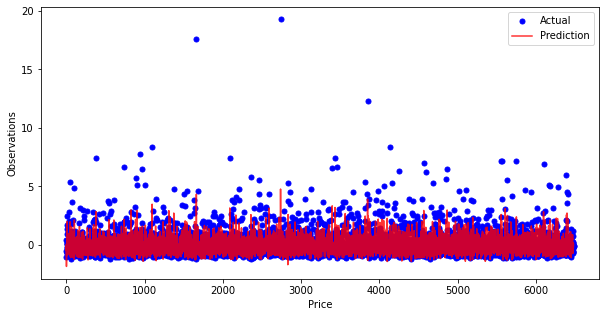

In [132]:
# Evaluating the Model

y_pred_quant = res.predict(principal_test)

fig = plt.figure(figsize=(10, 5))
plt.plot(np.arange(0,len(y_test_quant),1), y_test_quant, 'b.', markersize=10, label='Actual')
plt.plot(np.arange(0,len(y_test_quant),1), y_pred_quant, 'r-', label='Prediction', alpha =0.8)
plt.xlabel('Price')
plt.ylabel('Observations')
plt.legend(loc='upper right')

# As can be seen, the higher price values are not being predicted accurately by the quantile(.5)

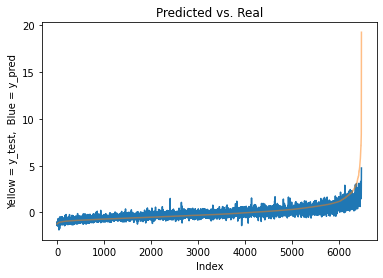

In [133]:
test_plot = pd.DataFrame({'y_test':y_test_quant.ravel(),'y_pred': y_pred_quant})
test_plot.sort_values(by=['y_test'],inplace=True)
plt.plot(np.arange(0,len(test_plot),1), test_plot['y_pred'])
plt.plot(np.arange(0,len(test_plot),1), test_plot['y_test'], alpha=0.5)
plt.ylabel('Yellow = y_test,  Blue = y_pred')
plt.xlabel('Index')
plt.title('Predicted vs. Real');


# Below are the Observations sorted by y_test values, i.e., the higher the index,
# the higher the Price

# We can see that as the price gets beyond 6000, the prediction becomes quite inaccurate.

Text(0, 0.5, 'y_predicted')

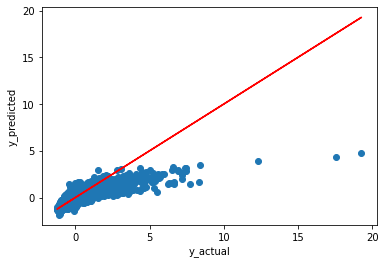

In [121]:
plt.scatter(y_test_quant.ravel(), y_pred_quant)
plt.plot(y_test_quant.ravel(), y_test_quant.ravel(), "r")
plt.xlabel('y_actual')
plt.ylabel('y_predicted')

# The heteroskedasticity in the model can be seen below as the values veer off the red
# line that represents the predicted values.

In [122]:
# Evaluating the Algorithm

mae_quant = metrics.mean_absolute_error(y_test_quant, y_pred_quant)
mse_quant = metrics.mean_squared_error(y_test_quant, y_pred_quant)
rmse_quant = np.sqrt(metrics.mean_squared_error(y_test_quant, y_pred_quant))

ratio_quant = (rmse_quant / house.price.mean()) * 100
r2_score_quant = r2_score(y_test_quant, y_pred_quant)

print('Mean Absolute Error:', mae_quant)
print('Mean Squared Error:', mse_quant)
print('Root Mean Squared Error:', rmse_quant)
print('Percentage of RMSE to mean is: ' +str(ratio_quant) + ' %')
print('R score:', r2_score_quant)

# The RMSE is the best by far, however, the R-score is lower than our lasso model.
# To improve the prediction's R-score, the data could be grouped into quantiles 0.1 - 0.9

Mean Absolute Error: 0.32790704012204475
Mean Squared Error: 0.37975280325959554
Root Mean Squared Error: 0.6162408646459561
Percentage of RMSE to mean is: 0.0001140801958403329 %
R score: 0.6202471967404046


# RECOMMENDATION

The Lasso Model provided the best R score of 0.71, however, the Quantile Regression provided the best RMSE score of 0.00011%. This means that the Lasso model has the most variance explained by the model and Quantile has the most accurate results. However, from our plots it can be seen that this accuracy is only true for lower value houses as the most expensive ones are not accurately predicted. To determine if this accuracy score is good a suggestion could be using Root Mean Square Logarithmic Error due to the transformations we did and see if the score is any different. Another suggestion is to improve the prediction's R-score, by grouping the data into quantiles 0.1 - 0.9 and carrying out the prediction based on the quantile which the data falls in.

---

# FOLLOW UP QUESTIONS

## a.) Did we have the right data?

Yes we did as most of our R-scores were higher than the recommended minimum of 0.60


## b.) Do we need other data to answer our question?

Yes we do, our best model describes 71% of the variance in the data, meaning there's 29% not captured in the data. There's room to improve this by gathering more data that could describe some of this 29% variance that we have not captured in the model.


## c.) Did we have the right question?

Yes we did. Home prices are important since buying a home is the most expensive single purchase that most people make in their life, and home ownership is one of the top goals of people, especially families.